In [2]:
## Load in metada tafile
# 1. read metadata;
# smp_2_size, smp_2_donor
smp_2_size = {}
smp_2_donor = {}
smp_2_species = {}
smp_2_align = {}
species_2_phylum = {}
smp_2_phylum={}
Filtered_Species_smplist={}
Filtered_Species_donorlist={}
Filtered_Species_sizelist={}
with open('../Intermediary-files/filtered_samples.csv') as file:
    for line in file:
        if 'GenomeSize' not in line:
            smp, sp, size, donor, align, phylum = line.strip().split(',')[0],line.strip().split(',')[1], int(line.strip().split(',')[2]), line.strip().split(',')[3],line.strip().split(',')[4],line.strip().split(',')[7]
            smp_2_size[smp] = size
            smp_2_donor[smp] = donor
            smp_2_species[smp]=sp
            smp_2_align[smp]=align
            smp_2_phylum[smp]=phylum
            species_2_phylum[sp]=phylum
            if sp not in Filtered_Species_smplist:
                Filtered_Species_smplist[sp]=[]
                Filtered_Species_donorlist[sp]={}
                Filtered_Species_sizelist[sp]=[]
            Filtered_Species_smplist[sp].append(smp)
            Filtered_Species_sizelist[sp].append(size)
            if donor not in Filtered_Species_donorlist[sp]:
                Filtered_Species_donorlist[sp][donor]=[]
            Filtered_Species_donorlist[sp][donor].append(smp)

In [34]:
# 1. read in only the verified phages
Verified_phage={}
phage_long_2_annotation={}
with open('annotation_summary.tsv') as g:
    lines = g.readlines()
    for line in lines:
        tmp = line.split('\t')
        smptmp = tmp[0].split('|')[0].split('_Contig_')
        base_strain = smptmp[0]
        if base_strain not in Verified_phage:
            Verified_phage[base_strain]={}
        Verified_phage[base_strain][tmp[0].split('|')[0]]=1
        phage_long_2_annotation[tmp[0].split('|')[0]]=tmp[10].split('\n')[0]

In [9]:
# 2. Read in the metadata files
Species_DS = {}
base_strain_list=[]
base_strain_2_species={}
base_strain_2_donor={}
with open('sample_summary.csv') as g:
    lines = g.readlines()
    for line in lines:
        if 'StrainAtlas' in line:
            tmp = line.split(',')
            base_strain = tmp[0]
            sp = tmp[5]
            if sp not in Species_DS:
                Species_DS[sp]={}
            Species_DS[sp][base_strain]=1
            base_strain_list.append(base_strain)
            base_strain_2_species[base_strain]=sp
            base_strain_2_donor[base_strain]=tmp[6]

In [11]:
for sp in Species_DS:
    donors={}
    for base_strain in Species_DS[sp]:
        donor = base_strain_2_donor[base_strain]
        donors[donor]=1
    print(sp, len(Species_DS[sp]),len(donors))

# Define colors for phyla
phylum_colors = {
    'Bacteroidetes': '#4D9394',
    'Actinobacteria': '#F7CC7B',
    'Proteobacteria': '#ABABAB',
    'Firmicutes': '#F2BFB8'
}

Bifidobacterium_adolescentis 127 86
Bifidobacterium_longum 21 13
Lacticaseibacillus_paracasei 4 4
Alistipes_shahii 1 1
Bariatricus_comes 2 1
Bifidobacterium_bifidum 4 4
Collinsella_aerofaciens_J 4 3
Bacillus_J_thermoamylovorans 1 1
Collinsella_sp900542555 3 1
Eggerthella_lenta 4 3
Escherichia_coli 6 6
Collinsella_aerofaciens_A 2 1
Enterococcus_B_faecium 5 4
Enterococcus_B_lactis 1 1
Citrobacter_freundii 1 1
Bacteroides_uniformis 92 78
Collinsella_aerofaciens_P 5 1
Bacteroides_fragilis_A 2 2
Collinsella_sp900759565 1 1
Desulfovibrio_sp900243745 2 1
Streptococcus_parasanguinis 1 1
Collinsella_sp900545665 1 1
Clostridium_paraputrificum 1 1
Streptococcus_parasanguinis_E 1 1
Mediterraneibacter_faecis 2 1
Collinsella_aerofaciens_Q 1 1
Streptococcus_salivarius 3 2
Dorea_A_longicatena 1 1
Parabacteroides_merdae 14 14
Escherichia_fergusonii 1 1
Anaerostipes_hadrus_A 1 1
Agathobaculum_butyriciproducens 1 1
Collinsella_sp900541145 3 2
Collinsella_sp900541125 3 2
Enterocloster_sp005845215 1 1
Bifi

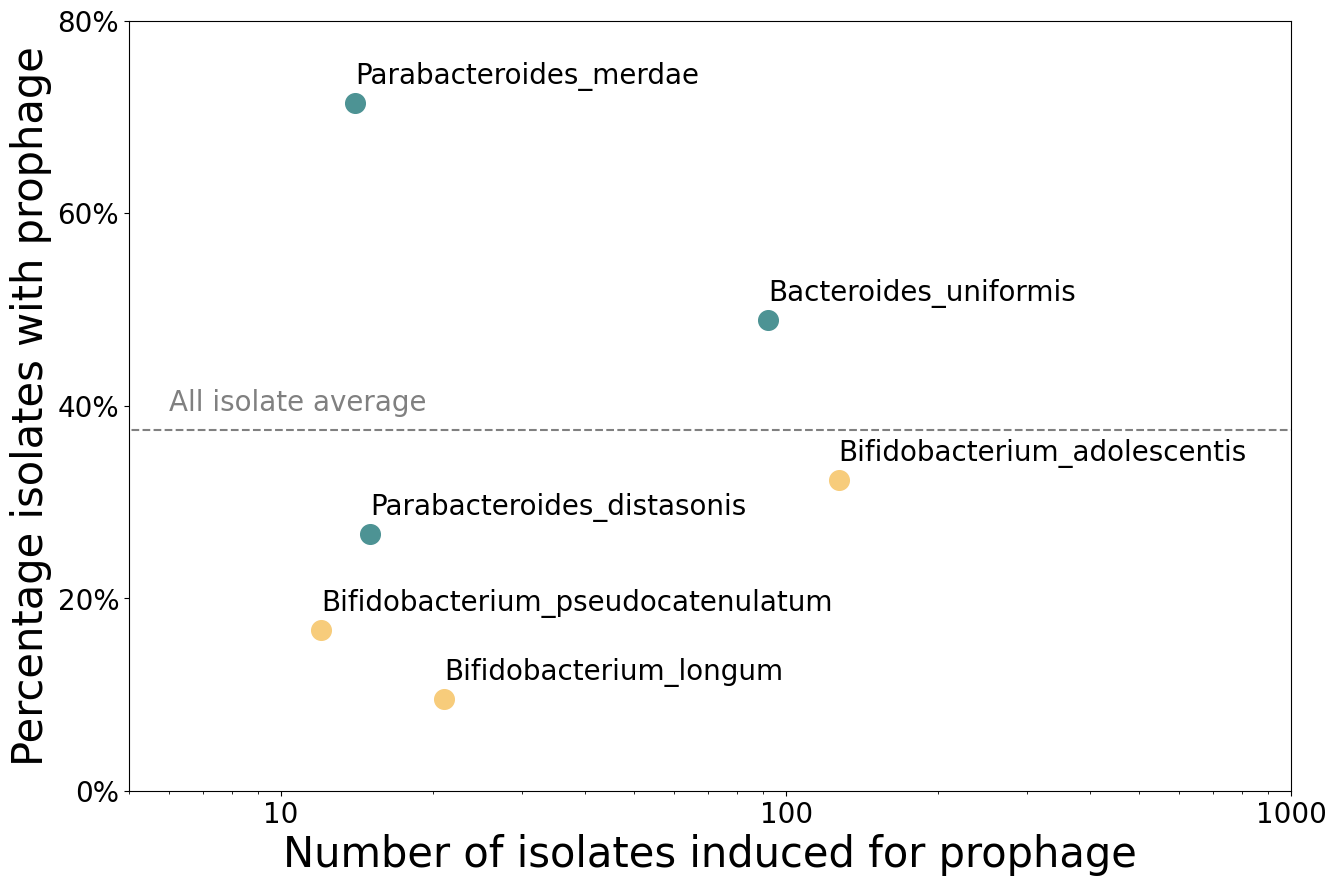

In [14]:
import matplotlib.pyplot as plt
import numpy as np

cutoff = 10
fig, ax = plt.subplots(figsize=(15, 10))

others_tot=0
others_phage=0
# Create a scatter plot with a logarithmic x-axis
for sp in Species_DS:
    if len(Species_DS[sp])>cutoff:
        tot = 0
        phage = 0
        for base_strain in Species_DS[sp]:
            tot+=1
            if base_strain in Verified_phage:
                phage+=1
        phylum=species_2_phylum[sp]
        color = phylum_colors[phylum]
        ax.scatter(float(tot),phage/tot,s=200,color=color)
        ax.text(float(tot),phage/tot+0.02,sp,fontsize=20)
    else:
        for base_strain in Species_DS[sp]:
            others_tot+=1
            if base_strain in Verified_phage:
                others_phage+=1
plt.plot([0,10000],[others_phage/others_tot,others_phage/others_tot],'--',color='gray')
# ax.scatter(float(others_tot),others_phage/others_tot,s=80,color='salmon')
ax.text(6,others_phage/others_tot+0.02,'All isolate average',color='gray',fontsize=20)
# Define custom tick values for the x-axis
custom_x_ticks = [10, 100,1000]  # Add the desired values here

ax.set_xscale("log")
# Set custom tick values on the x-axis
plt.xticks(custom_x_ticks)
# Add labels and title

ax.set_ylim(0,0.8)
ax.set_xlim(5,1000)


plt.xlabel("Number of isolates induced for prophage",fontsize=30)
plt.ylabel("Percentage isolates with prophage",fontsize=30)
x_ticks_positions = [0,0.2,0.4,0.6,0.8]  # Positions where custom labels will be placed
custome_x_ticks_positions = ["0%","20%","40%","60%","80%"]  # Positions where custom labels will be placed
plt.yticks(x_ticks_positions, custome_x_ticks_positions, fontsize=20)
# # Customize x-axis tick labels
x_ticks_positions = [10,100,1000]  # Positions where custom labels will be placed
custome_x_ticks_positions = ["0","500K","1M","1.5M","2M"]  # Positions where custom labels will be placed
plt.xticks(x_ticks_positions, x_ticks_positions, fontsize=20)
plt.savefig("figures/Figure4B.pdf")
# Show the plot
plt.show()

In [28]:
# Clustering of phage particles
## 2. Read in mash-distance matrix
import numpy as np

# Create distance matrix with ones
phage_list = []
phage_to_phage_long_name={}
for base_strain in Verified_phage:
    for phage_long in Verified_phage[base_strain]:
        tmp_long=phage_long.split('_Contig_')
        tmp2 = tmp_long[1].split('_')
        phage = tmp_long[0]+'_Contig_'+tmp2[0]+'_'+tmp2[-1]
        phage_list.append(phage)
        phage_to_phage_long_name[phage]=phage_long
        
dist_matrix = np.ones((len(phage_list), len(phage_list)))

# Create a dictionary for quick lookup of smplist indices
smplist_dict = {smp: idx for idx, smp in enumerate(phage_list)}

# Open the file for reading
with open('phage-distance.txt') as g:
    for i, line in enumerate(g):
        tmp = line.strip().split('\t')
        smp1 = tmp[0].split('.fasta')[0]
        smp2 = tmp[1].split('.fasta')[0]
        dist = float(tmp[2])
        idx_1 = smplist_dict.get(smp1)
        idx_2 = smplist_dict.get(smp2)
        if idx_1 is not None and idx_2 is not None:
            dist_matrix[idx_1, idx_2] = dist
            dist_matrix[idx_2, idx_1] = dist
        if i % 100000 == 0:
            print(i)

0


In [16]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [17]:
# 4. clustering based on mash matrix
# Assuming 'dist_matrix' is your numpy distance matrix
# Replace this with your actual distance matrix

# Set the distance cutoff
cutoff = 0.05

# Perform agglomerative clustering with a distance cutoff
clustering = AgglomerativeClustering(n_clusters=None, affinity='precomputed', linkage='average', distance_threshold=cutoff)
cluster_labels = clustering.fit_predict(dist_matrix)

# Print the cluster assignments
print("Cluster assignments:", cluster_labels)
clusters_dict = {}
for cl in cluster_labels:
    clusters_dict[cl]=1
print(len(clusters_dict))

Cluster assignments: [  1   5  10   1  16  64   5  10   2  99  16 139  16  64 101  10  16  64
 132 128  16   5   5   5   2  10 123   5   2 100  92 115 102 138  10   1
   5   5  79 108   5 135  71 131 133 129 116 106  81 113 127 125  80 119
  57 130  85 117   3  75  98 109 124  14  34 111  24   4  29  53  26  29
  34 107   5  27  53  26  51  76  96  90 103  33  32  61 100   5 126  27
  53 118  86  97  74 114  73 140 121 120   5  25   0  29   8   4  30 104
  24  12   8   7  12  36  49  24  91  87 136   7 105 122  26  60  65  12
 110  66   7   4  15   7  24  15  24  54  29 137  49   8  24 134  84  24
  29  53  51  26   6   4   6  24   7   8   0  24  54  25  53  26  51  48
  72   4  14  21  13  68  62  14  94  88  37  35  23  29   3  13  93  82
  23  83  89  13   3  30 104  31   3  21  31  44  24  54  40   3  77   3
 110  66  24  31  42  78  63  59  41  46  56  50   5  39  32  33  95  11
  38  52  47 112  11   5  43  19  32  33  18  45  58  32  33  17  32  33
  28  69  67  55  22  20  32  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [41]:
## Generate a table:
f = open('Table-S4-2.csv','w')
f.write('Phage-species,Phage name, Host genome, Contig, Start, End, Sequence length, Host species, Phage annotation'+'\n')

for idx in range(len(cluster_labels)):
    phage = phage_list[idx]
    phageID = cluster_labels[idx]
    if phageID not in phage_cluster:
        phage_cluster[phageID]=[]
    phage_cluster[phageID].append(phage)
    phage_long = phage_to_phage_long_name[phage]

    tmp = phage_long.split('_')
    base_strain = tmp[0]+'_'+tmp[1]
    sp = base_strain_2_species[base_strain]
    donor = base_strain_2_donor[base_strain]
    annot = phage_long_2_annotation[phage_long]
    
    f.write('phage-species-'+str(phageID)+','+phage+','+base_strain+','+str(tmp[3])+','+str(tmp[4])+','+str(tmp[5])+','+str(int(tmp[5])-int(tmp[4]))+','+sp+','+annot+'\n')
    
    print(phageID,phage,phage_long,sp,donor,annot)
f.close()
    

1 StrainAtlasProphage_001_Contig_1_1 StrainAtlasProphage_001_Contig_1_38000_76000_1 Bifidobacterium_adolescentis H235 Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes
5 StrainAtlasProphage_002_Contig_11_1 StrainAtlasProphage_002_Contig_11_2000_40000_1 Bifidobacterium_adolescentis H255 Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes
10 StrainAtlasProphage_003_Contig_2_1 StrainAtlasProphage_003_Contig_2_65000_117000_1 Bifidobacterium_adolescentis H239 Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes
1 StrainAtlasProphage_004_Contig_0_1 StrainAtlasProphage_004_Contig_0_11000_48000_1 Bifidobacterium_adolescentis H284 Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes
16 StrainAtlasProphage_007_Contig_3_1 StrainAtlasProphage_007_Contig_3_132000_193000_1 Bifidobacterium_adolescentis P77 Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes
64 StrainAtlasProphage_007_Contig_8_2 StrainAtlasProphage_007_Contig_8_0_33000_2 Bifi

/var/folders/ll/dkgm259n293gyd5xz26_25p00000gq/T/ipykernel_67093/125704818.py:38: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(dmat, method='ward')


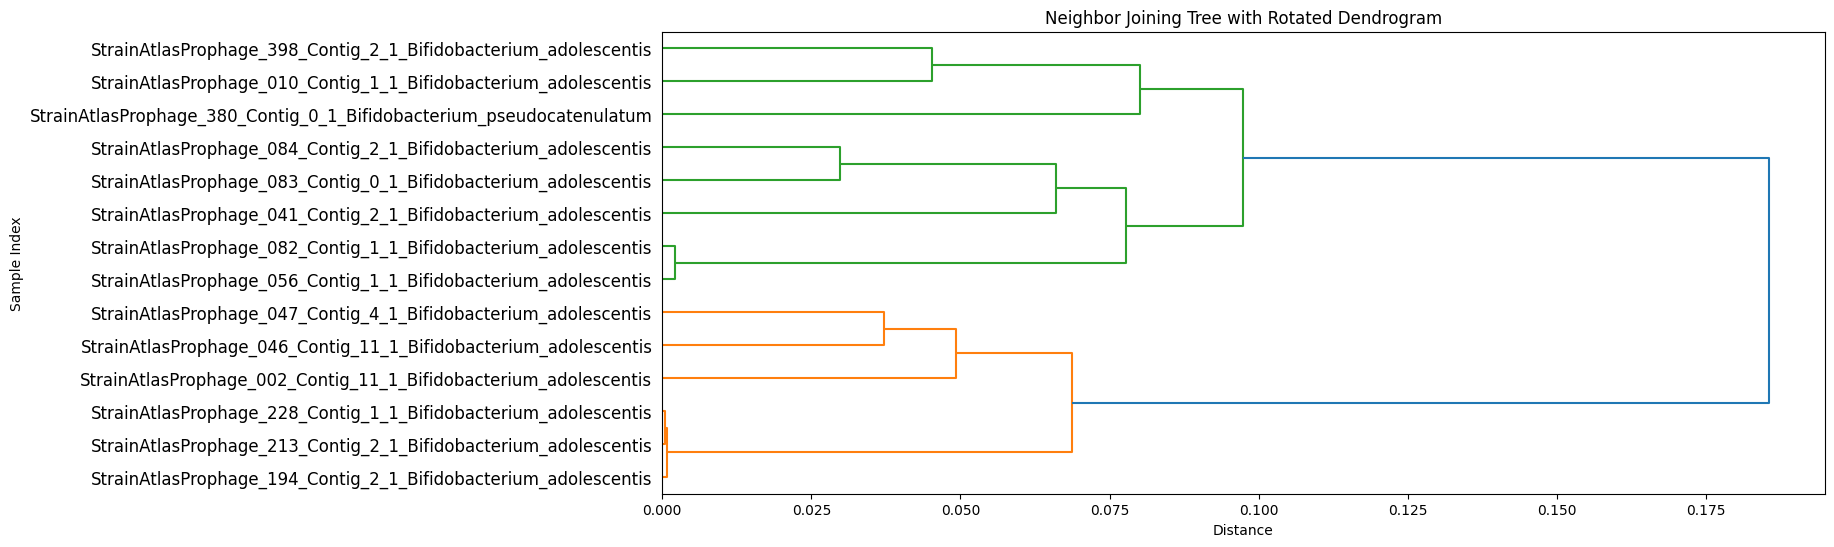

/var/folders/ll/dkgm259n293gyd5xz26_25p00000gq/T/ipykernel_67093/125704818.py:38: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(dmat, method='ward')


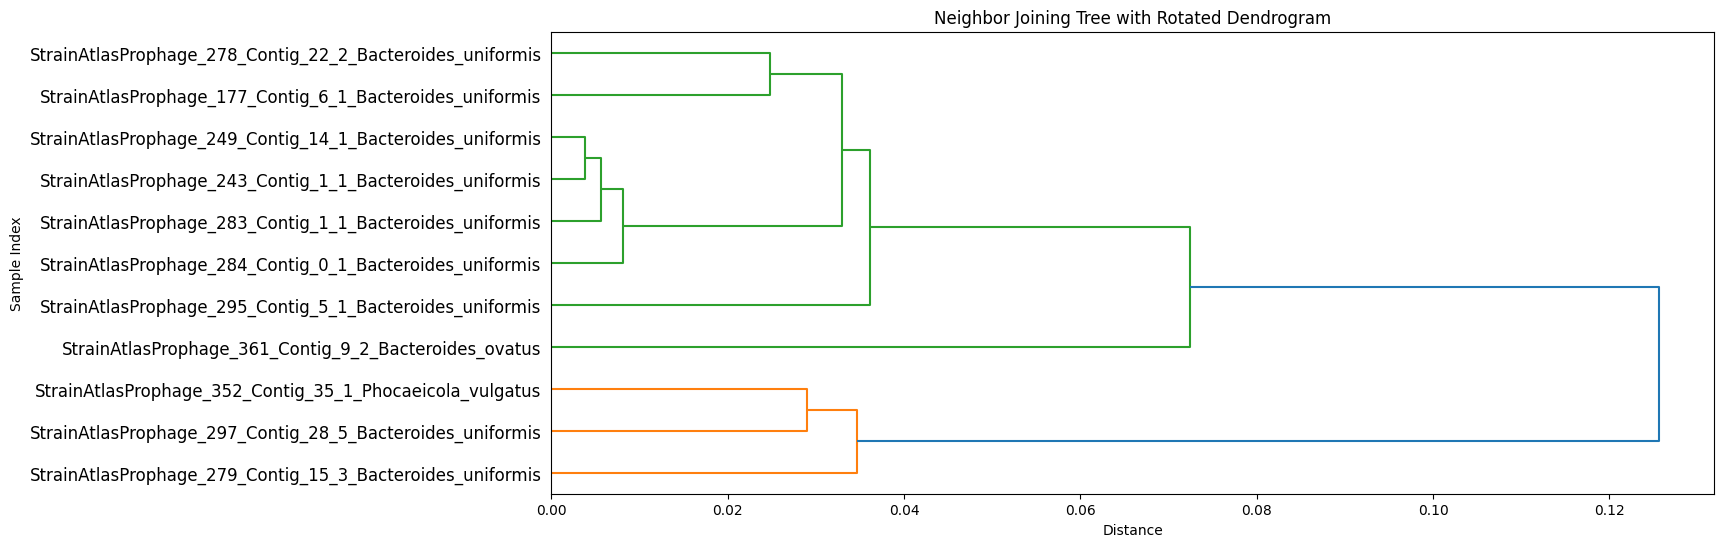

/var/folders/ll/dkgm259n293gyd5xz26_25p00000gq/T/ipykernel_67093/125704818.py:38: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(dmat, method='ward')


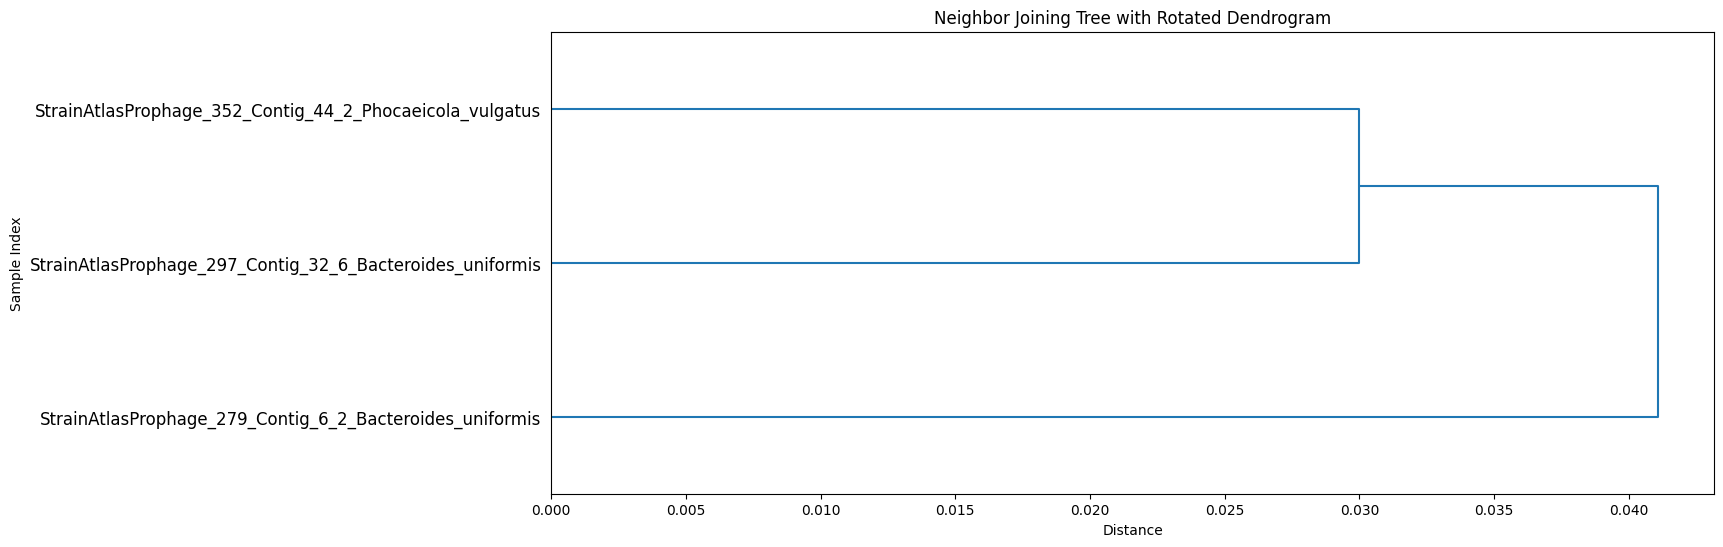

/var/folders/ll/dkgm259n293gyd5xz26_25p00000gq/T/ipykernel_67093/125704818.py:38: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(dmat, method='ward')


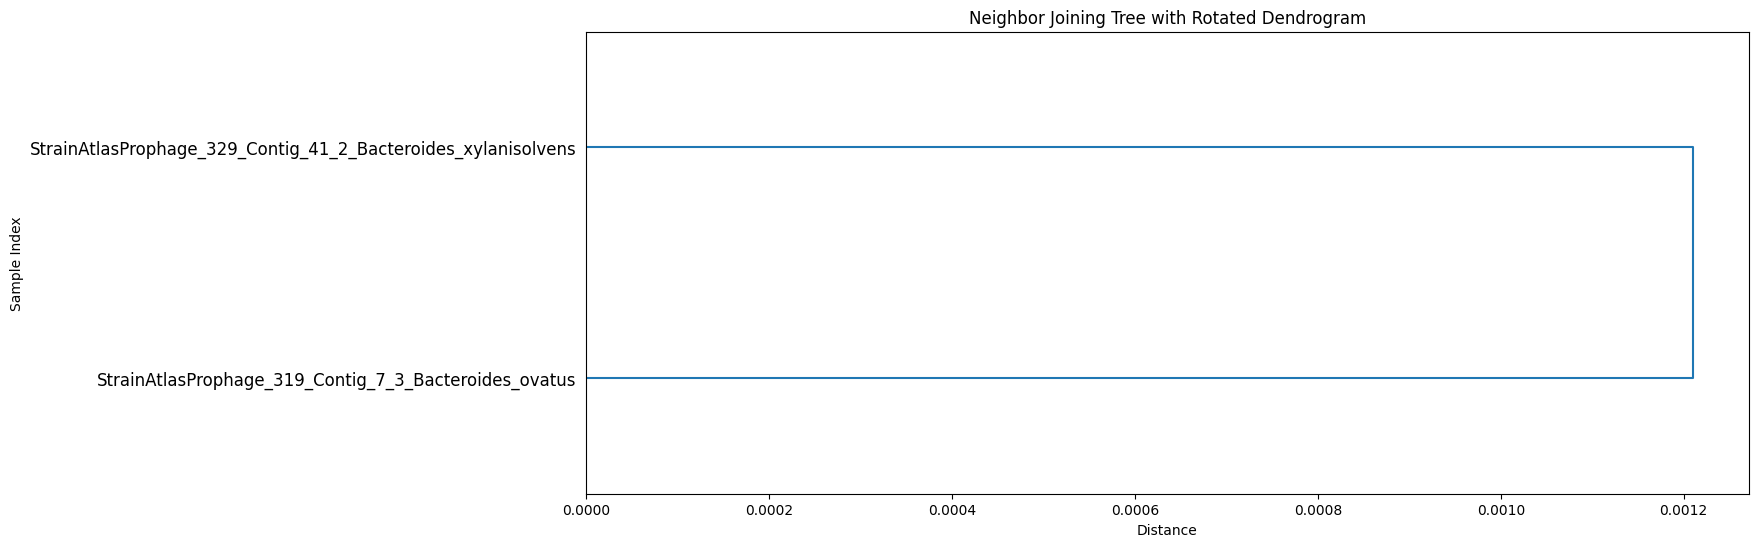

/var/folders/ll/dkgm259n293gyd5xz26_25p00000gq/T/ipykernel_67093/125704818.py:38: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(dmat, method='ward')


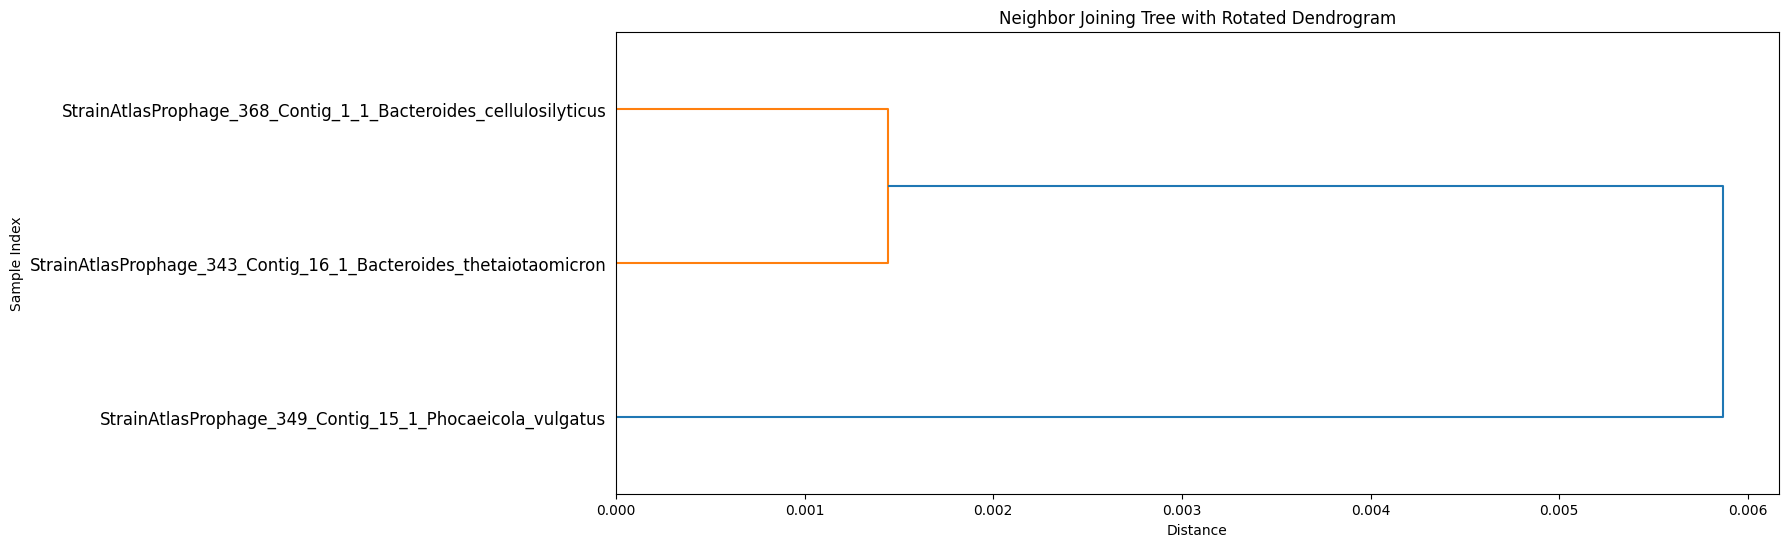

In [18]:
# import os
# import numpy as np
# from scipy.cluster import hierarchy

# phage_cluster = {}
# os.system('mkdir phage-tree')
# for idx in range(len(cluster_labels)):
#     smp = phage_list[idx]
#     phageID = cluster_labels[idx]
#     if phageID not in phage_cluster:
#         phage_cluster[phageID]=[]
#     phage_cluster[phageID].append(smp)
# for phageID in phage_cluster:
#     # print(len(phage_cluster[phageID]),phageID)
#     sp_list={}
#     phage_within_cluster=[]
#     for phage in phage_cluster[phageID]:
#         base_strain = phage.split('_Contig_')[0]
#         # print(base_strain,base_strain_2_species[base_strain],phage)
#         sp=base_strain_2_species[base_strain]
#         sp_list[sp]=1
#     if len(sp_list)>1:
#         dmat = []
#         labels=[]
#         for phage1 in phage_cluster[phageID]:
#             tmp=[]
#             labels.append(phage1+'_'+base_strain_2_species[phage1.split('_Contig_')[0]])
#             for phage2 in phage_cluster[phageID]:
#                 idx_1 = smplist_dict.get(phage1)
#                 idx_2 = smplist_dict.get(phage2)
#                 tmp.append(dist_matrix[idx_1, idx_2])
#             dmat.append(tmp)
#         dmat=np.array(dmat)
#         # Labels for leaves

#         # Neighbor joining tree calculation
        
#         linkage_matrix = hierarchy.linkage(dmat, method='ward')
#         # Function to convert the linkage matrix to Newick format
#         def to_newick(linkage_matrix, labels):
#             n = len(labels)
#             node_labels = {i: label for i, label in enumerate(labels)}
            
#             def rec(node_id):
#                 if node_id < n:
#                     return node_labels[node_id]
#                 else:
#                     left, right = int(linkage_matrix[node_id - n, 0]), int(linkage_matrix[node_id - n, 1])
#                     return f"({rec(left)}, {rec(right)})"
            
#             return rec(2 * n - 2) + ";"
        
#         # Convert linkage matrix to Newick format
#         newick_str = to_newick(linkage_matrix, labels)
        
#         # Save Newick string to a file
#         with open(str(phageID)+'.tree', 'w') as file:
#             file.write(newick_str)

        
        
#         # Plotting the tree with labels and rotated dendrogram
#         plt.figure(figsize=(15, 6))
#         dendrogram = hierarchy.dendrogram(linkage_matrix, labels=labels, orientation='right')  # Rotate the dendrogram
#         plt.title('Neighbor Joining Tree with Rotated Dendrogram')
#         plt.xlabel('Distance')
#         plt.ylabel('Sample Index')
#         plt.savefig('phage-tree/'+'phage'+str(phageID)+'.png')
#         plt.show()

In [20]:
import os
import numpy as np
from scipy.cluster import hierarchy
# import brewer2mpl
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import *
from scipy import *
import scipy.spatial.distance as distance
import scipy.cluster.hierarchy as sch
import argparse

def get_newick(node, parent_dist, leaf_names, newick='') -> str:
    """
    Convert sciply.cluster.hierarchy.to_tree()-output to Newick format.

    :param node: output of sciply.cluster.hierarchy.to_tree()
    :param parent_dist: output of sciply.cluster.hierarchy.to_tree().dist
    :param leaf_names: list of leaf names
    :param newick: leave empty, this variable is used in recursion.
    :returns: tree in Newick format
    """
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parent_dist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parent_dist - node.dist, newick)
        else:
            newick = ");"
        newick = get_newick(node.get_left(), node.dist, leaf_names, newick=newick)
        newick = get_newick(node.get_right(), node.dist, leaf_names, newick=",%s" % (newick))
        newick = "(%s" % (newick)
        return newick
from scipy.cluster import hierarchy
phage_cluster = {}
os.system('mkdir phage-tree')
for idx in range(len(cluster_labels)):
    smp = phage_list[idx]
    phageID = cluster_labels[idx]
    if phageID not in phage_cluster:
        phage_cluster[phageID]=[]
    phage_cluster[phageID].append(smp)
for phageID in phage_cluster:
    # print(len(phage_cluster[phageID]),phageID)
    sp_list={}
    phage_within_cluster=[]
    for phage in phage_cluster[phageID]:
        base_strain = phage.split('_Contig_')[0]
        # print(base_strain,base_strain_2_species[base_strain],phage)
        sp=base_strain_2_species[base_strain]
        sp_list[sp]=1
    if len(sp_list)>1:
        dmat = []
        labels=[]
        for phage1 in phage_cluster[phageID]:
            tmp=[]
            labels.append(phage1+'_'+base_strain_2_species[phage1.split('_Contig_')[0]])
            for phage2 in phage_cluster[phageID]:
                idx_1 = smplist_dict.get(phage1)
                idx_2 = smplist_dict.get(phage2)
                tmp.append(dist_matrix[idx_1, idx_2])
            dmat.append(tmp)
        dmat=np.array(dmat)
        # Labels for leaves

        pairwise_dists = distance.squareform(dmat)
        clusters = sch.linkage(pairwise_dists,method='ward')

        
        # for genomeid in genomelist:
        #     donor = GenomeID_to_Donor[genomeid]
        #     new_genemelist.append(donor + '_' + genomeid + '_' + genomeid_to_original_plate[genomeid] + '_' + genomeid_to_inter_plate[genomeid])
        
        
        tree = hierarchy.to_tree(clusters, False)
        leaf_names = labels
        tree_newick = get_newick(tree, tree.dist, leaf_names)
        
        f = open(str(phageID)+'.tree','w')
        f.write(tree_newick)
        f.close()


mkdir: phage-tree: File exists


In [21]:
import random

sp = 'Bifidobacterium_adolescentis'



subsamping1={}
for i in range(1,len(Species_DS[sp])+1):
    subsamping1[i]=[]

smp_list = list(Species_DS[sp])
for i in range(1,len(Species_DS[sp])+1):
    print(i)
    for repeat in range(100):
        random_subset = random.sample(smp_list, i)
        existing_phage={}
        donornum={}
        for base_strain in random_subset:
            donor = base_strain_2_donor[base_strain]
            donornum[donor]=1
        for phageID in phage_cluster:
            for phage in phage_cluster[phageID]:
                base_strain = phage.split('_Contig_')[0]
                if base_strain in random_subset:
                    existing_phage[phageID]=1
        subsamping1[len(donornum)].append(len(existing_phage))

sp = 'Bacteroides_uniformis'

subsamping2={}
for i in range(1,len(Species_DS[sp])+1):
    subsamping2[i]=[]

smp_list = list(Species_DS[sp])
for i in range(1,len(Species_DS[sp])+1):
    print(i)
    for repeat in range(100):
        random_subset = random.sample(smp_list, i)
        existing_phage={}
        donornum={}
        for base_strain in random_subset:
            donor = base_strain_2_donor[base_strain]
            donornum[donor]=1
        for phageID in phage_cluster:
            for phage in phage_cluster[phageID]:
                base_strain = phage.split('_Contig_')[0]
                if base_strain in random_subset:
                    existing_phage[phageID]=1
        subsamping2[len(donornum)].append(len(existing_phage))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


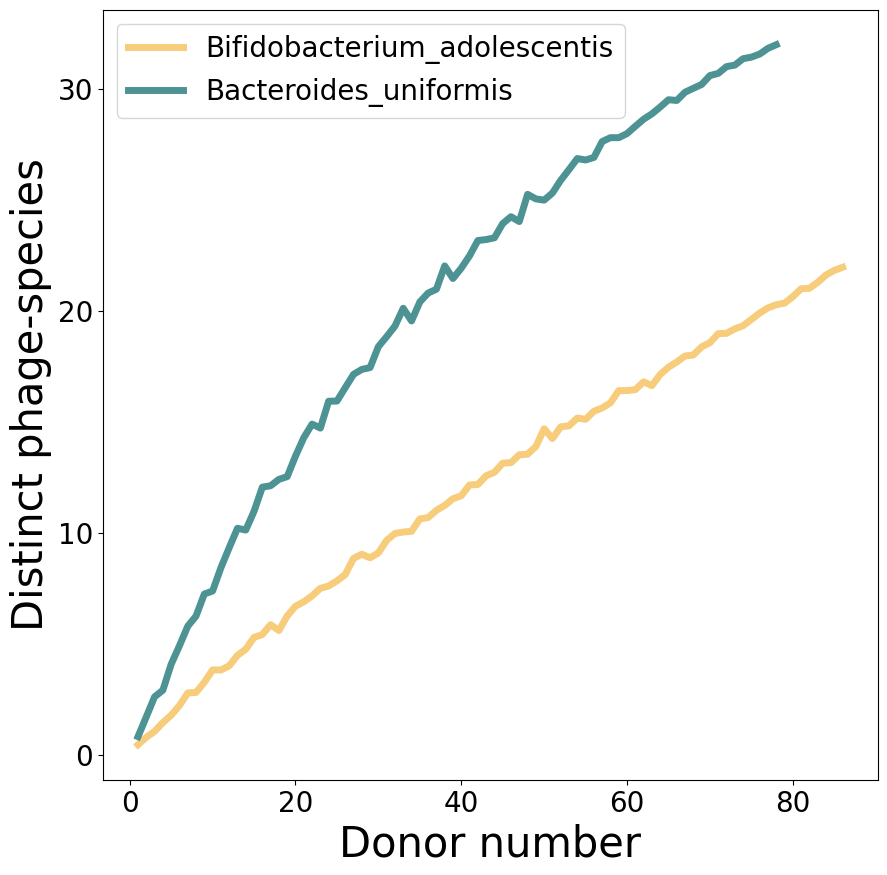

In [25]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 10))  # You can adjust the width and height as needed

xs1 = []
ys1 = []
for i in subsamping1:
    xs1.append(i)
    ys1.append(np.average(subsamping1[i]))
plt.plot(xs1, ys1, label='Bifidobacterium_adolescentis',linewidth=5,color='#F7CC7B')

xs2 = []
ys2 = []
for i in subsamping2:
    xs2.append(i)
    ys2.append(np.average(subsamping2[i]))
plt.plot(xs2, ys2, label='Bacteroides_uniformis',linewidth=5,color='#4D9394')

# Adding legend
plt.legend(fontsize=20)

# You may want to add axis labels and a title here as well
ax.set_xlabel('Donor number',fontsize=30)
ax.set_ylabel('Distinct phage-species',fontsize=30)

# # Customize x-axis tick labels
x_ticks_positions = [0,10,20,30]  # Positions where custom labels will be placed
cus_x_ticks_positions=["1K","10K","100K"]
plt.yticks(x_ticks_positions, x_ticks_positions, fontsize=20)

# # Customize x-axis tick labels
x_ticks_positions = [0,20,40,60,80]  # Positions where custom labels will be placed
cus_x_ticks_positions=["1K","10K","100K"]
plt.xticks(x_ticks_positions, x_ticks_positions, fontsize=20)
fig.savefig('figures/Figure4E.pdf', dpi=600, bbox_inches='tight')
plt.show()


In [24]:
subsamping2

{1: [0,
  1,
  2,
  0,
  3,
  0,
  2,
  0,
  2,
  1,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  1,
  1,
  2,
  1,
  0,
  3,
  2,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  3,
  2,
  1,
  0,
  0,
  1,
  0,
  0,
  3,
  1,
  0,
  1,
  2,
  3,
  0,
  3,
  0,
  1,
  0,
  0,
  1,
  2,
  1,
  3,
  0,
  0,
  0,
  2,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  3,
  1,
  0,
  3,
  0,
  0,
  0,
  0,
  2,
  0,
  1,
  0,
  1,
  1],
 2: [3,
  1,
  1,
  1,
  2,
  6,
  0,
  2,
  4,
  0,
  1,
  1,
  1,
  2,
  0,
  0,
  1,
  2,
  2,
  2,
  2,
  1,
  2,
  2,
  3,
  0,
  1,
  6,
  1,
  0,
  3,
  0,
  3,
  1,
  0,
  5,
  4,
  2,
  0,
  1,
  1,
  2,
  0,
  1,
  4,
  2,
  1,
  2,
  1,
  3,
  0,
  6,
  1,
  0,
  0,
  0,
  2,
  3,
  1,
  2,
  4,
  1,
  2,
  1,
  0,
  1,
  1,
  2,
  1,
  3,
  3,
  0,
  3,
  0,
  2,
  6,
  5,
  3,
  1,
  0,
  0,
  1,
  7,
  1,
  1,
  2,
  3,
  2,
  5,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0